# Matplotlib

In [1]:
from matplotlib import pyplot as plt

### Basic line graph with stylings

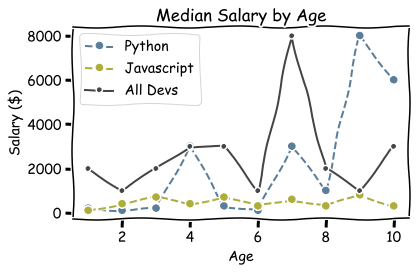

In [2]:
# Styling xkcd-comic style
# print(plt.style.available)
# plt.style.use('fivethirtyeight')
plt.xkcd()
# Remove border
plt.box(True)

# Define x-axis values
ages_x = [1,2,3,4,5,6,7,8,9,10]

# Define python dev salaries y-axis values
py_dev_y = [200, 100, 200, 3000,300,100, 3000, 1000, 8000, 6000]
# Plot on agraph
plt.plot(ages_x, py_dev_y, label="Python", color='#5a7d9a', linestyle="--",linewidth=2, marker="o") 

# Define js dev salaries y-axis values
js_dev_y = [100, 400, 700, 400,700,300, 600, 300, 800, 300]
# Plot on agraph
plt.plot(ages_x, js_dev_y, label="Javascript", color='#adad3b', linestyle="--", linewidth=2, marker="o") 


# Define y-axis values
dev_y = [2000, 1000, 2000, 3000,3000,1000, 8000, 2000, 1000, 3000]
# Plot on agraph
plt.plot(ages_x, dev_y, label='All Devs', color='#444444', linestyle="-", marker=".")

plt.xlabel('Age')
plt.ylabel('Salary ($)')
plt.title('Median Salary by Age')
plt.legend() # Show legend using labels
# plt.grid(True) # Add grid

plt.savefig('plot.png') #save png
plt.tight_layout() #padding
plt.show()

## Bar graphs and read from csv

#### Vertical bar chart

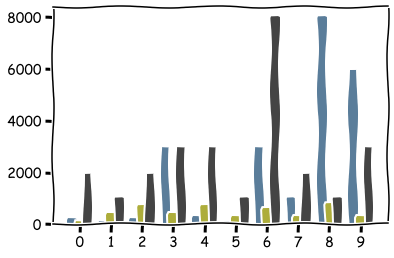

In [3]:
import numpy as np

# To Avoid bars overlapping on top of each other
x_indexes = np.arange(len(ages_x))
bar_width = 0.25

plt.bar(x_indexes - bar_width, py_dev_y, width=bar_width, label="Python", color='#5a7d9a')
plt.bar(x_indexes, js_dev_y, width=bar_width, label="Javascript", color='#adad3b')
plt.bar(x_indexes + bar_width, dev_y, width=bar_width, label='All Devs', color='#444444')
plt.xticks(ticks=x_indexes, label=ages_x) #label x axis correctly
plt.savefig('plot.png') #save png
plt.show()

#### Horizontal bar chart

In [4]:
import pandas as pd
from collections import Counter

In [5]:
# Read from csv and use counter to count totals of each type of property
df = pd.read_csv('properties.csv').dropna()
type_counter = Counter()
x = [i for i in df['type']]
type_counter.update(x)

In [6]:
# Create arrays to be represented on the graph for the data
type_ = []
no_of_properties = []
for t in type_counter:
    type_.append(t)
    no_of_properties.append(type_counter[t])


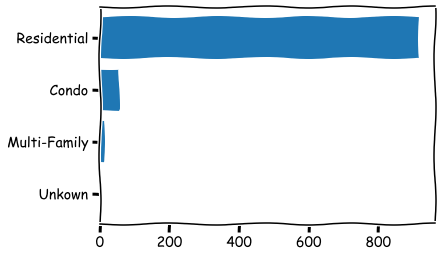

In [7]:
# Plot horizontal graph
plt.barh(type_[::-1], no_of_properties[::-1])
plt.show()

# Pie charts

/Users/jey/.local/share/virtualenvs/datascience-7NC_lez9/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # This is added back by InteractiveShellApp.init_path()


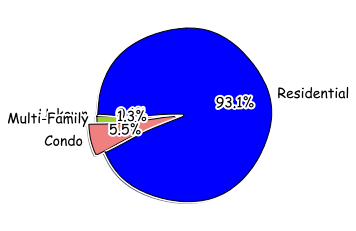

In [8]:
slices = [no_of_properties[::-1]]
labels = type_[::-1]
cols = ['gold', 'yellowgreen', 'lightcoral', 'blue']
explode = [0,0,0.1,0]
plt.pie(slices, labels=labels,
        wedgeprops={"edgecolor": "black"}, 
        colors=cols, 
        explode=explode,
        shadow=True,
        startangle=180,
        autopct="%1.1f%%"
       )
plt.show()

# Stack Plots

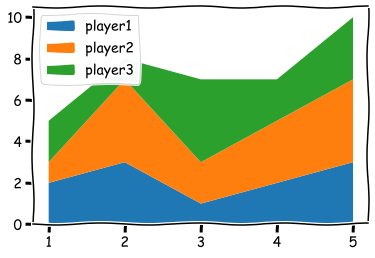

In [9]:
minutes = [1,2,3,4,5]
player1=[2,3,1,2,3]
player2=[1,4,2,3,4]
player3=[2,1,4,2,3]

labels = ['player1', 'player2','player3']

plt.stackplot(minutes, player1, player2, player3, labels=labels)
plt.legend(loc = "upper left")
plt.show()

# Time series data

In [10]:
from datetime import datetime, timedelta
from matplotlib import dates as mpl_dates

In [11]:
plt.style.use('seaborn')
dates = [
    datetime(2019, 1, 1),
    datetime(2019, 1, 2),
    datetime(2019, 1, 3),
    datetime(2019, 1, 4),
    datetime(2019, 1, 5),
    datetime(2019, 1, 6),
    datetime(2019, 1, 7),
]

y=[200, 150, 175, 340, 203, 450, 425]

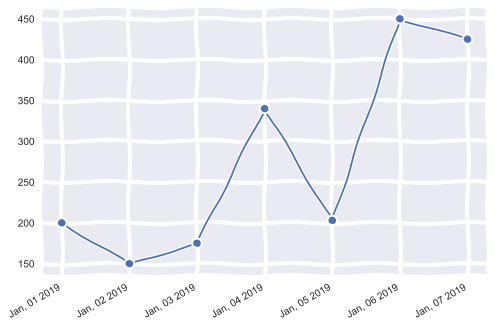

In [12]:
plt.plot_date(dates, y, linestyle="solid")
#formating the date
date_format = mpl_dates.DateFormatter("%b, %d %Y")
plt.gca().xaxis.set_major_formatter(date_format)

# format the data in slanting manner
plt.gcf().autofmt_xdate()
plt.show()

# Plotting realtime data

In [13]:
from itertools import count
import random
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib notebook

<IPython.core.display.Javascript object>


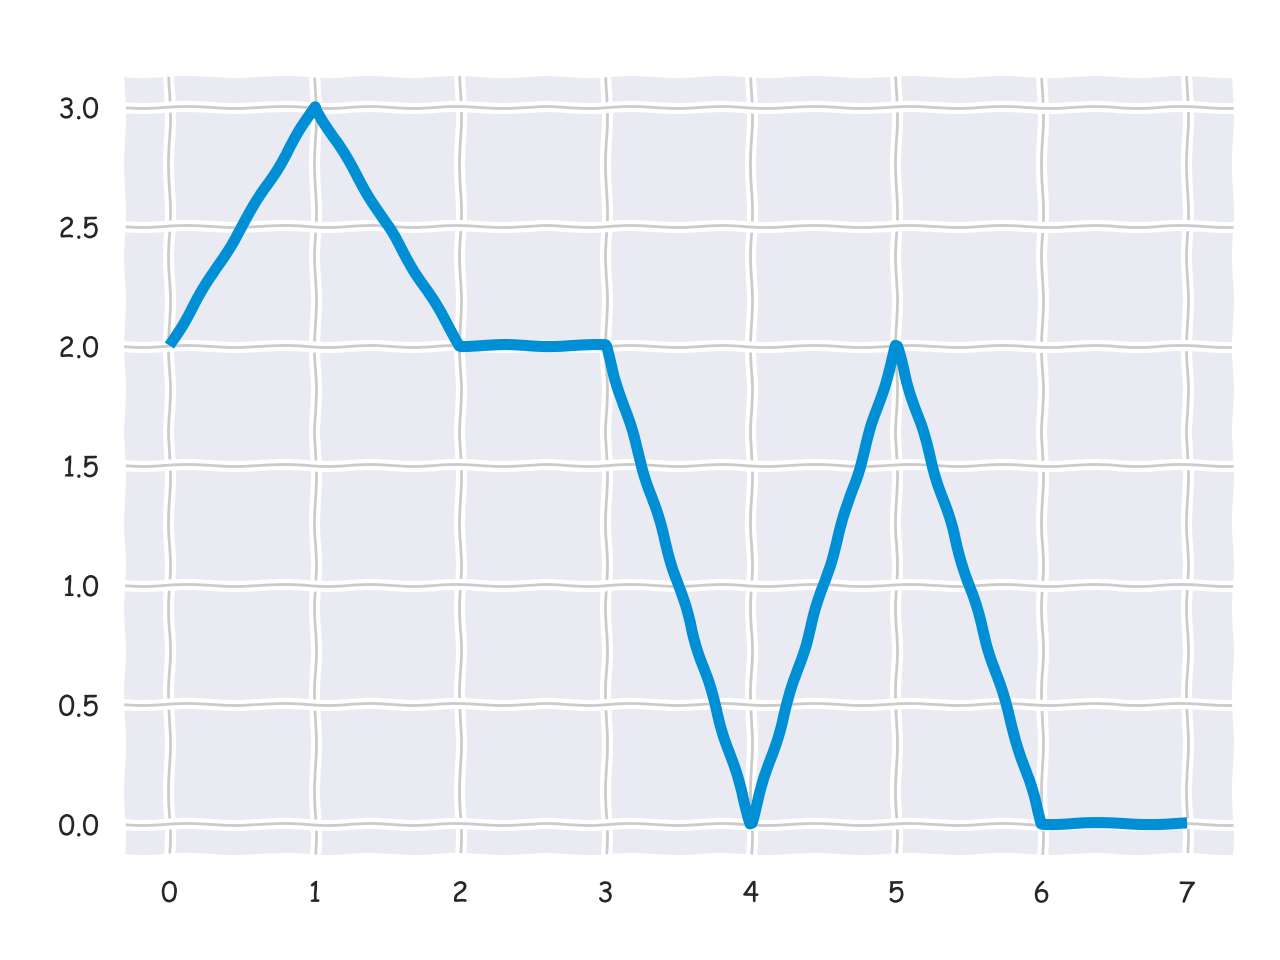

In [15]:
x_vals = []
y_vals = []

index = count()

def animate(i):
    x_vals.append(next(index))
    y_vals.append(random.randint(0, 3))
    plt.cla()
    plt.plot(x_vals, y_vals)
    
ani = FuncAnimation(plt.gcf(), animate, interval=100000)
plt.tight_layout()
plt.show()

# Sub plots

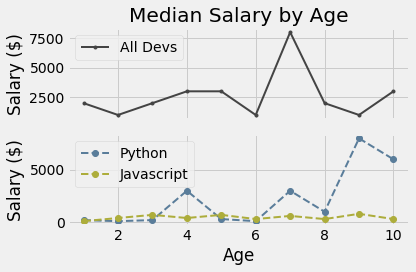

In [10]:
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')

ages_x = [1,2,3,4,5,6,7,8,9,10]

fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols=1, sharex=True)


dev_y = [2000, 1000, 2000, 3000,3000,1000, 8000, 2000, 1000, 3000]
ax1.plot(ages_x, dev_y, label='All Devs', color='#444444', linestyle="-",linewidth=2, marker=".")

py_dev_y = [200, 100, 200, 3000,300,100, 3000, 1000, 8000, 6000]
ax2.plot(ages_x, py_dev_y, label="Python", color='#5a7d9a', linestyle="--",linewidth=2, marker="o") 

js_dev_y = [100, 400, 700, 400,700,300, 600, 300, 800, 300]
ax2.plot(ages_x, js_dev_y, label="Javascript", color='#adad3b', linestyle="--", linewidth=2, marker="o") 


ax1.set_ylabel('Salary ($)')
ax1.set_title('Median Salary by Age')
ax1.legend() # Show legend using labels


ax2.set_xlabel('Age')
ax2.set_ylabel('Salary ($)')
ax2.legend() # Show legend using labels

plt.savefig('plot.png') #save png
plt.tight_layout() #padding
plt.show()